

###  **Problem Statement**

In the highly competitive landscape of digital commerce, businesses struggle to identify high-value customers and allocate marketing resources efficiently. Generic marketing campaigns often result in low conversion rates, wasted budgets, and missed opportunities to retain valuable customers. There is a pressing need for data-driven personalization that can enhance customer engagement, increase ROI, and build long-term loyalty.

This project aims to develop a predictive model to estimate **Customer Lifetime Value (CLV)** using historical customer data such as demographics, transaction history, and engagement behavior. By segmenting customers based on their predicted CLV, the project will formulate **personalized marketing strategies** tailored to different customer segments (e.g., high, medium, low CLV groups). These strategies will enable businesses to focus efforts on high-value customers through targeted promotions, retention strategies, and tailored communication, while also nurturing medium and low-value segments efficiently.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# This line reads a CSV (comma-separated values) file into a Pandas DataFrame.
df=pd.read_csv('D:\CSM-354_Project\personalized_marketing_clv_unclean.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,MaritalStatus,AnnualIncome,MembershipStatus,ChannelPreference,LastPurchaseDate,Frequency,AverageOrderValue,RecencyDays,CampaignResponseRate,WebsiteVisitsLastMonth,CartAbandonmentRate,LoyaltyScore,CLV
0,1001,Other,56,Single,51746.48,Silver,Social Media,2025-03-09,15,83.50,34,0.61,11,0.22,68.58,2111.46
1,1002,Male,45,Married,63331.18,Silver,Email,2025-02-01,12,111.64,70,0.36,7,0.33,80.60,2419.46
2,1003,Other,34,Single,72338.17,Gold,Email,2025-02-25,10,95.61,46,0.08,7,0.46,64.20,1569.92
3,1004,Male,43,Single,61446.25,Silver,Email,2025-01-28,9,49.83,74,0.58,14,0.08,58.14,709.21
4,1005,Other,61,Married,72521.93,Gold,Push Notification,2025-03-29,12,115.59,14,0.19,10,0.47,90.64,2644.33


In [41]:
df.shape

(9050, 16)

In [42]:
# It shows null values in the columns
df.isnull().sum()

CustomerID                 0
Gender                    90
Age                        0
MaritalStatus             91
AnnualIncome              91
MembershipStatus           0
ChannelPreference         91
LastPurchaseDate           0
Frequency                  0
AverageOrderValue         90
RecencyDays                0
CampaignResponseRate       0
WebsiteVisitsLastMonth     0
CartAbandonmentRate        0
LoyaltyScore               0
CLV                        0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9050 entries, 0 to 9049
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              9050 non-null   int64  
 1   Gender                  8960 non-null   object 
 2   Age                     9050 non-null   object 
 3   MaritalStatus           8959 non-null   object 
 4   AnnualIncome            8959 non-null   object 
 5   MembershipStatus        9050 non-null   object 
 6   ChannelPreference       8959 non-null   object 
 7   LastPurchaseDate        9050 non-null   object 
 8   Frequency               9050 non-null   int64  
 9   AverageOrderValue       8960 non-null   float64
 10  RecencyDays             9050 non-null   int64  
 11  CampaignResponseRate    9050 non-null   float64
 12  WebsiteVisitsLastMonth  9050 non-null   int64  
 13  CartAbandonmentRate     9050 non-null   float64
 14  LoyaltyScore            9050 non-null   

In [44]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                        object
MaritalStatus              object
AnnualIncome               object
MembershipStatus           object
ChannelPreference          object
LastPurchaseDate           object
Frequency                   int64
AverageOrderValue         float64
RecencyDays                 int64
CampaignResponseRate      float64
WebsiteVisitsLastMonth      int64
CartAbandonmentRate       float64
LoyaltyScore              float64
CLV                       float64
dtype: object

In [45]:
df.isnull().sum()

CustomerID                 0
Gender                    90
Age                        0
MaritalStatus             91
AnnualIncome              91
MembershipStatus           0
ChannelPreference         91
LastPurchaseDate           0
Frequency                  0
AverageOrderValue         90
RecencyDays                0
CampaignResponseRate       0
WebsiteVisitsLastMonth     0
CartAbandonmentRate        0
LoyaltyScore               0
CLV                        0
dtype: int64

In [57]:
# Convert 'Age' and 'AnnualIncome' to numeric types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Converts non-numeric values to NaN
df['AnnualIncome'] = pd.to_numeric(df['AnnualIncome'], errors='coerce')

# Convert 'LastPurchaseDate' to datetime
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')

# Check the updated data types
print(df.dtypes)


# All the data types have been changed like which are error
# Convert 'Age' and 'AnnualIncome' to numeric types
# If there are any non-numeric values (like 'unknown', 'N/A', or symbols), they can't be converted to numbers.
# Setting errors='coerce' tells pandas to replace such invalid values with NaN (missing value) instead of raising an error.


CustomerID                         int32
Gender                            object
Age                                int32
MaritalStatus                     object
AnnualIncome                     float64
MembershipStatus                  object
ChannelPreference                 object
LastPurchaseDate          datetime64[ns]
Frequency                        float64
AverageOrderValue                float64
RecencyDays                        int32
CampaignResponseRate             float64
WebsiteVisitsLastMonth             int64
CartAbandonmentRate              float64
LoyaltyScore                     float64
CLV                              float64
dtype: object


In [58]:
num_cols = [
    'Age', 'AnnualIncome', 'Frequency', 'AverageOrderValue',
    'RecencyDays', 'CampaignResponseRate', 'WebsiteVisitsLastMonth',
    'CartAbandonmentRate', 'LoyaltyScore', 'CLV'
]


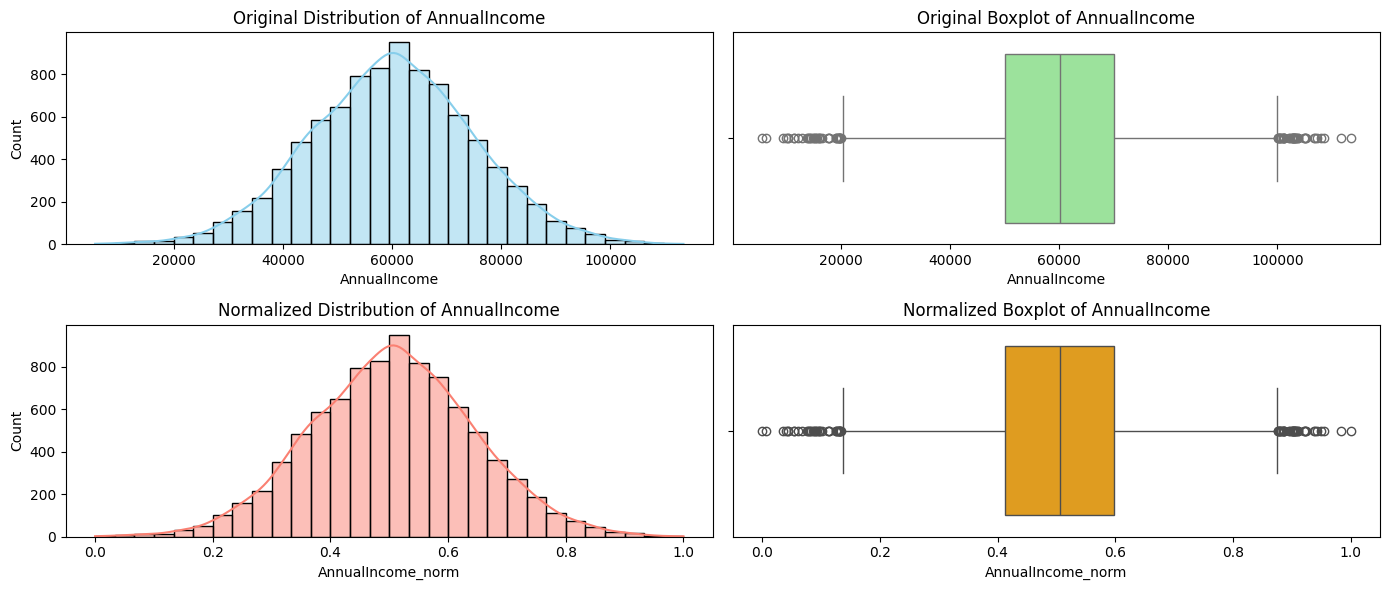

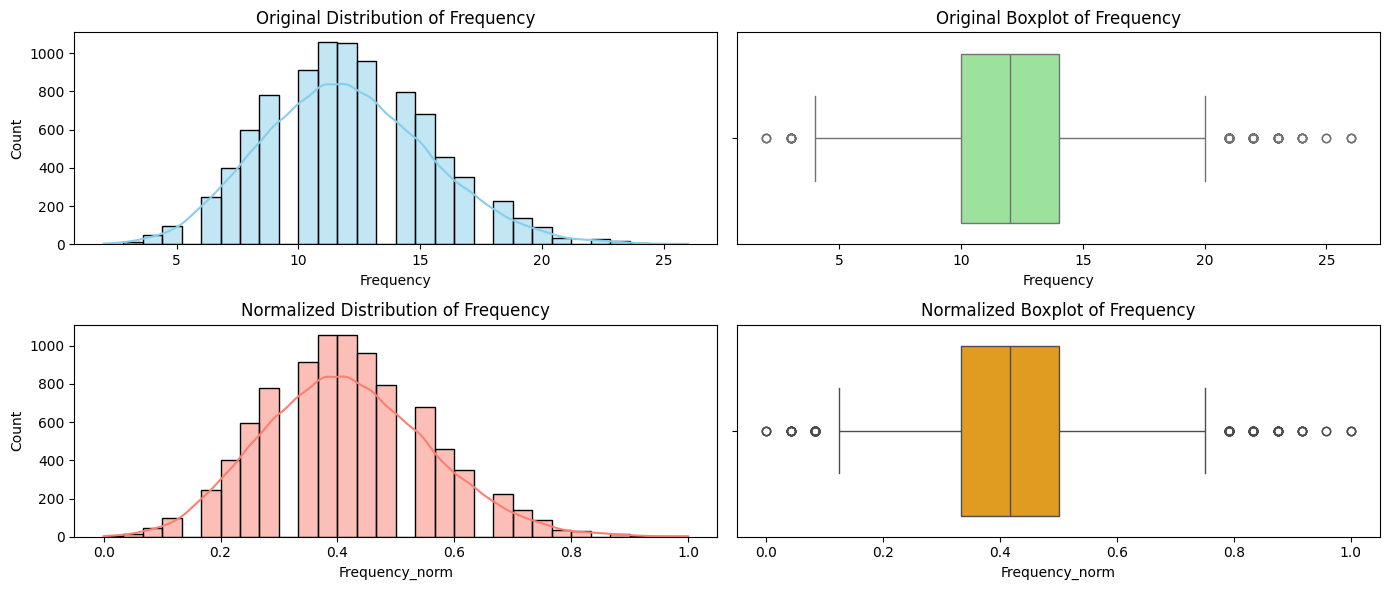

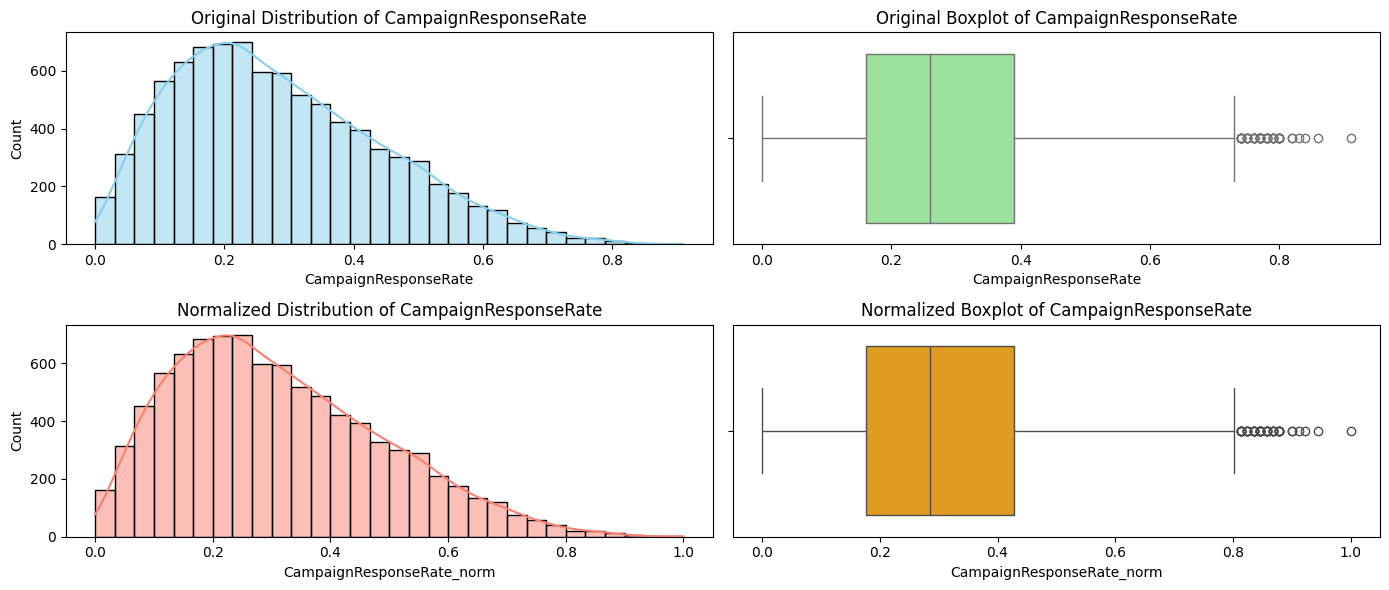

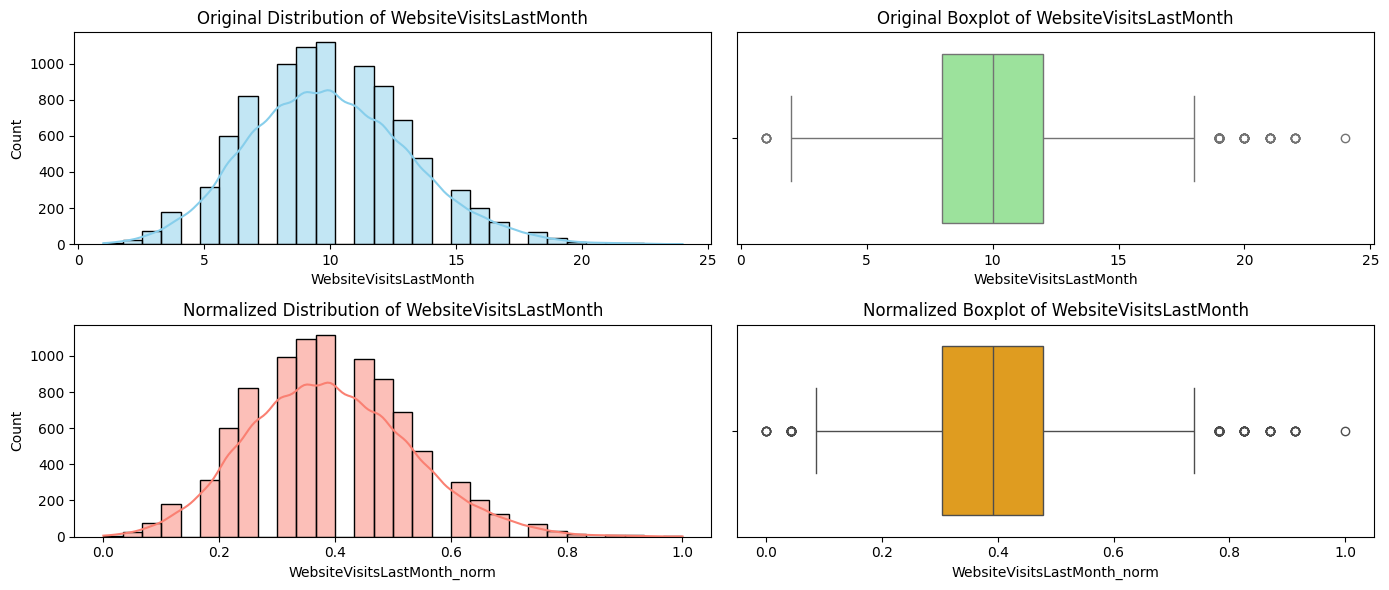

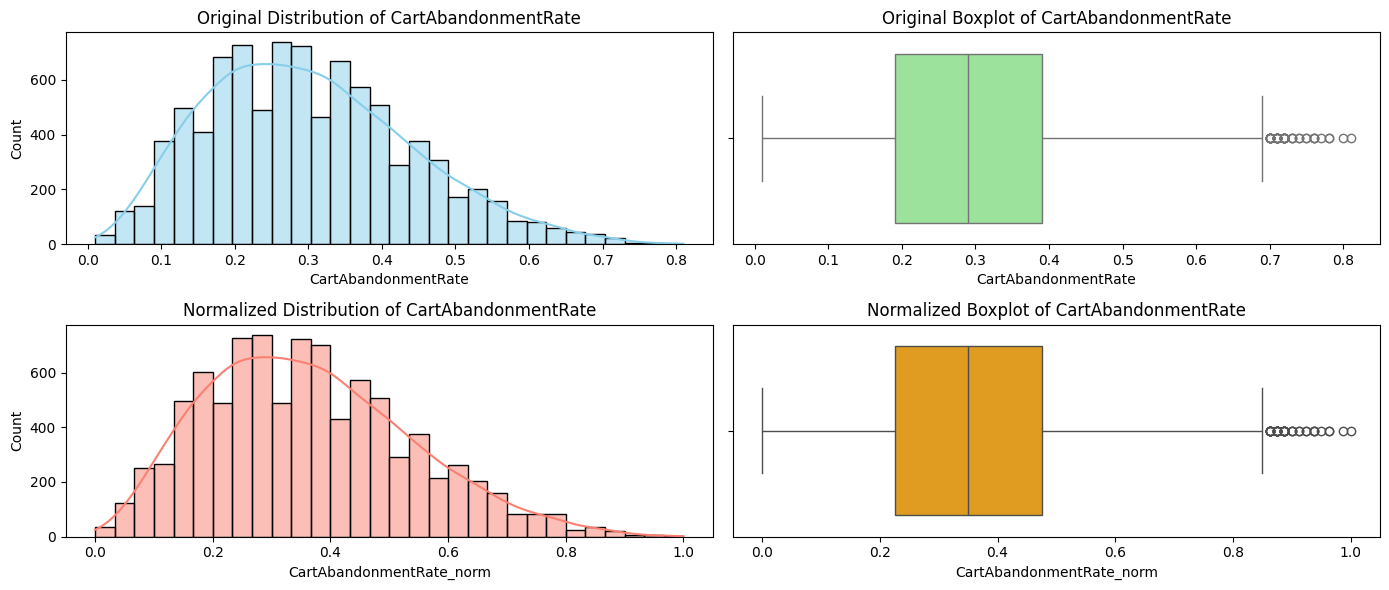

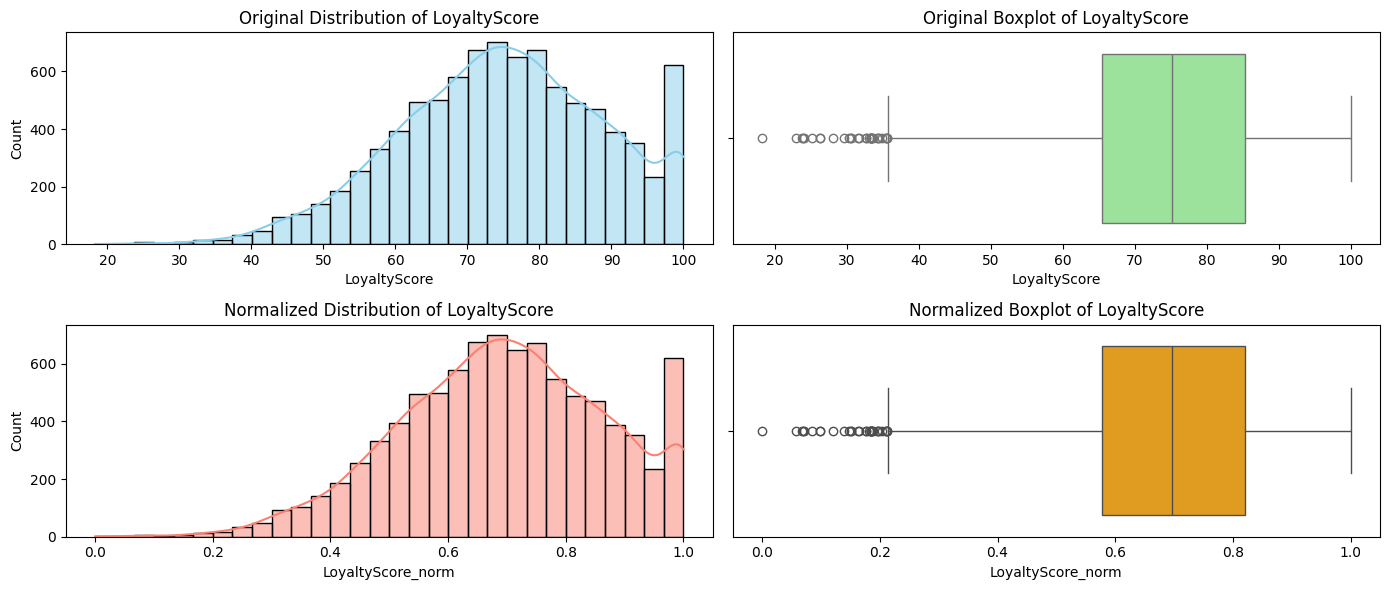

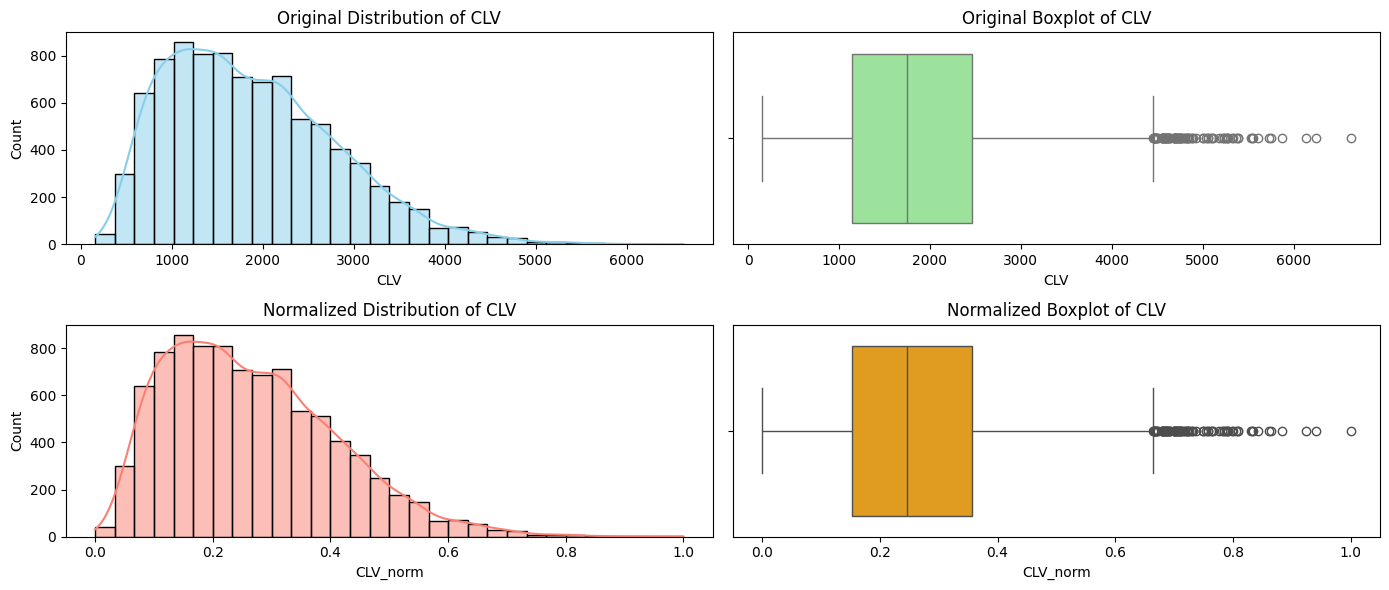

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Define your numerical columns
num_cols = [
     'AnnualIncome', 'Frequency', 'CampaignResponseRate', 'WebsiteVisitsLastMonth',
    'CartAbandonmentRate', 'LoyaltyScore', 'CLV'
]

# Step 1: Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=[col + '_norm' for col in num_cols])

# Step 2: Plot original and normalized distributions and boxplots
for i, col in enumerate(num_cols):
    norm_col = col + '_norm'
    
    plt.figure(figsize=(14, 6))

    # Original histogram
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Original Distribution of {col}')
    
    # Original boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Original Boxplot of {col}')

    # Normalized histogram
    plt.subplot(2, 2, 3)
    sns.histplot(df_normalized[norm_col], kde=True, color='salmon', bins=30)
    plt.title(f'Normalized Distribution of {col}')
    
    # Normalized boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df_normalized[norm_col], color='orange')
    plt.title(f'Normalized Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [60]:
# 2. Handle Numerical Columns: Fill NaN with median 


# Filling missing (NaN) values in numerical columns using the median.
# Reason for using median:
# - The median is robust to outliers, unlike the mean which can be skewed by extreme values.
# - This helps maintain the central tendency of the data without being influenced by unusually high or low values

df['Age'].fillna(df['Age'].median(), inplace=True)
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)
df['Frequency'].fillna(df['Frequency'].median(), inplace=True)
df['AverageOrderValue'].fillna(df['AverageOrderValue'].median(), inplace=True)
df['CampaignResponseRate'].fillna(df['CampaignResponseRate'].median(), inplace=True)
df['WebsiteVisitsLastMonth'].fillna(df['WebsiteVisitsLastMonth'].median(), inplace=True)
df['CartAbandonmentRate'].fillna(df['CartAbandonmentRate'].median(), inplace=True)
df['LoyaltyScore'].fillna(df['LoyaltyScore'].median(), inplace=True)
df['CLV'].fillna(df['CLV'].median(), inplace=True)

C:\Users\jaswa\AppData\Local\Temp\ipykernel_7316\3396712640.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\jaswa\AppData\Local\Temp\ipykernel_7316\3396712640.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [61]:
# 3. Ensure correct data types
df['CustomerID'] = df['CustomerID'].astype(int)
df['Age'] = df['Age'].astype(int)
df['AnnualIncome'] = df['AnnualIncome'].astype(float)
df['Frequency'] = df['Frequency'].astype(float)
df['RecencyDays'] = df['RecencyDays'].astype(int)

# 4. Remove any duplicates
df.drop_duplicates(inplace=True)

In [63]:
df['Gender'].fillna('Unknown', inplace=True)
df['MaritalStatus'].fillna('Unknown', inplace=True)
df['ChannelPreference'].fillna('Unknown', inplace=True)


C:\Users\jaswa\AppData\Local\Temp\ipykernel_7316\107692431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)
C:\Users\jaswa\AppData\Local\Temp\ipykernel_7316\107692431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [64]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
MaritalStatus             0
AnnualIncome              0
MembershipStatus          0
ChannelPreference         0
LastPurchaseDate          0
Frequency                 0
AverageOrderValue         0
RecencyDays               0
CampaignResponseRate      0
WebsiteVisitsLastMonth    0
CartAbandonmentRate       0
LoyaltyScore              0
CLV                       0
dtype: int64

Visulization of Plots

In [65]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalize numerical columns
scaler = MinMaxScaler()
df[['AnnualIncome', 'AverageOrderValue', 'CLV']] = scaler.fit_transform(df[['AnnualIncome', 'AverageOrderValue', 'CLV']])

# One-Hot Encode categorical columns
df = pd.get_dummies(df, columns=['Gender', 'MaritalStatus', 'MembershipStatus', 'ChannelPreference'], drop_first=True)

# Convert date and age if needed
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


Distribution of Normalized CLV

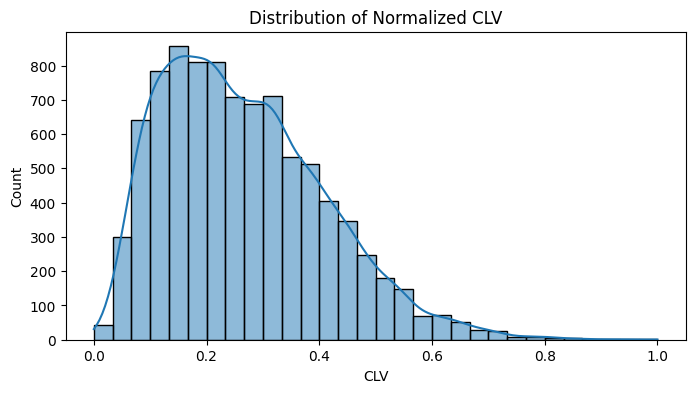

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of normalized CLV
plt.figure(figsize=(8, 4))
sns.histplot(df['CLV'], bins=30, kde=True)
plt.title('Distribution of Normalized CLV')
plt.show()


# This histogram with KDE (Kernel Density Estimate) is used to:
# - Understand the distribution of the 'CLV' (Customer Lifetime Value) variable.
# - Detect skewness (left/right), modality (uni/multi-modal), and general shape of the data.
# - Identify if the data is normally distributed or needs transformation (like log or box-cox).
# - Spot potential outliers or data anomalies that could affect modeling.



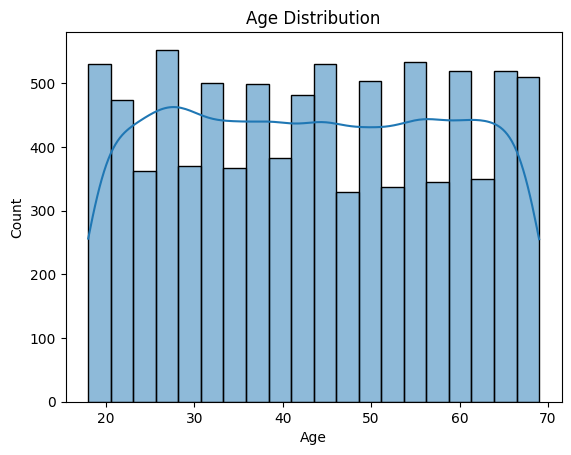

In [67]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# - The histogram shows how frequently different age values occur in the data.
# - The KDE provides a smooth estimate of the probability density function, helping to see the overall distribution shape.
# - With 20 bins, this gives a detailed view of the age distribution, showing potential skewness, modality, and outliers.


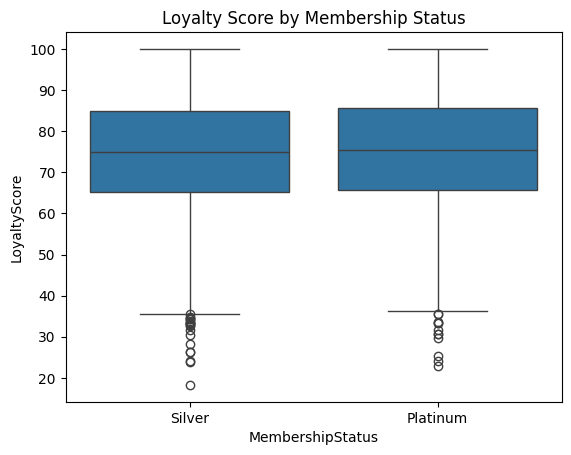

In [68]:
# Create a 'MembershipStatus' column
# The 'MembershipStatus' column is created by selecting the columns related to the membership status (Platinum and Silver).
# Using the 'idxmax' function, we identify the column with the maximum value for each row, indicating the highest membership status for that customer.
# After identifying the column, we use 'str.replace' to clean the column name and extract only the membership type (Platinum or Silver).

df['MembershipStatus'] = df[[
    'MembershipStatus_Platinum', 'MembershipStatus_Silver'
]].idxmax(axis=1).str.replace('MembershipStatus_', '')  # Extracting the membership status

# Plotting the relationship between Loyalty Score and Membership Status
# The boxplot is used to visualize the distribution of the 'LoyaltyScore' for each 'MembershipStatus' category.
# The boxplot shows the median, quartiles (25th and 75th percentiles), and any potential outliers in the loyalty scores for each membership type.

sns.boxplot(data=df, x='MembershipStatus', y='LoyaltyScore')  # x-axis is Membership Status, y-axis is Loyalty Score
plt.title("Loyalty Score by Membership Status")  # Adding a title to the plot
plt.show()  # Display the plot


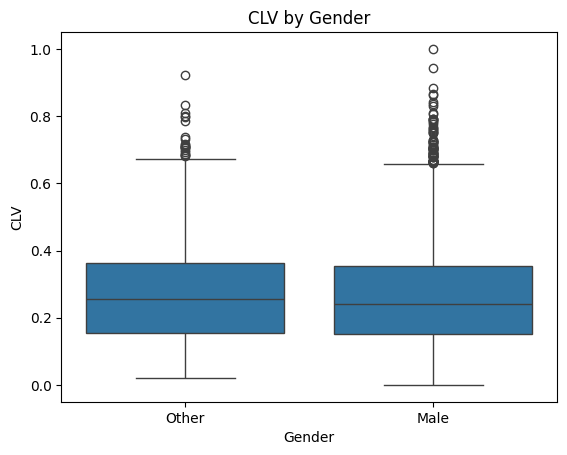

In [69]:
# Create a 'Gender' column from one-hot encoded dummies
# The 'Gender' column is created by selecting the two columns related to gender: 'Gender_Male' and 'Gender_Other'.
# Using the 'idxmax' function, we identify the column with the maximum value for each row, indicating the gender (Male or Other).
# After identifying the column, we use 'str.replace' to clean the column name and extract only the gender type (Male or Other).

df['Gender'] = df[['Gender_Male', 'Gender_Other']].idxmax(axis=1).str.replace('Gender_', '')  # Extracting gender

# Now plot
# The boxplot visualizes the relationship between 'CLV' (Customer Lifetime Value) and 'Gender'.
# The boxplot helps to compare the distribution of CLV for each gender category.
# It shows the median CLV, the interquartile range (25th to 75th percentiles), and any potential outliers for each gender.

sns.boxplot(data=df, x='Gender', y='CLV')  # x-axis is Gender, y-axis is CLV
plt.title("CLV by Gender")  # Adding a title to the plot
plt.show()  # Display the plot


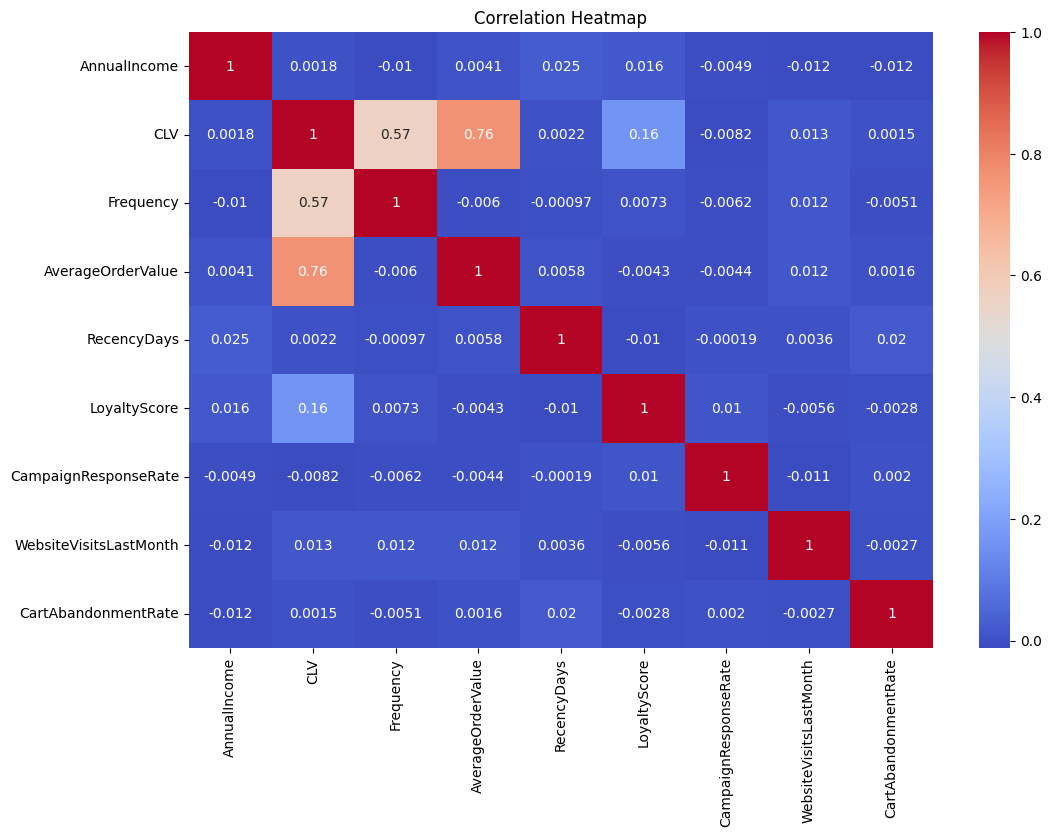

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


# Generate the correlation matrix for selected numerical columns
# The correlation matrix shows the relationships between pairs of variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[[
    'AnnualIncome', 'CLV', 'Frequency', 'AverageOrderValue',
    'RecencyDays', 'LoyaltyScore', 'CampaignResponseRate',
    'WebsiteVisitsLastMonth', 'CartAbandonmentRate'
]].corr(), annot=True, cmap='coolwarm') # Color map for heatmap, coolwarm highlights positive and negative correlations
plt.title("Correlation Heatmap")
plt.show()


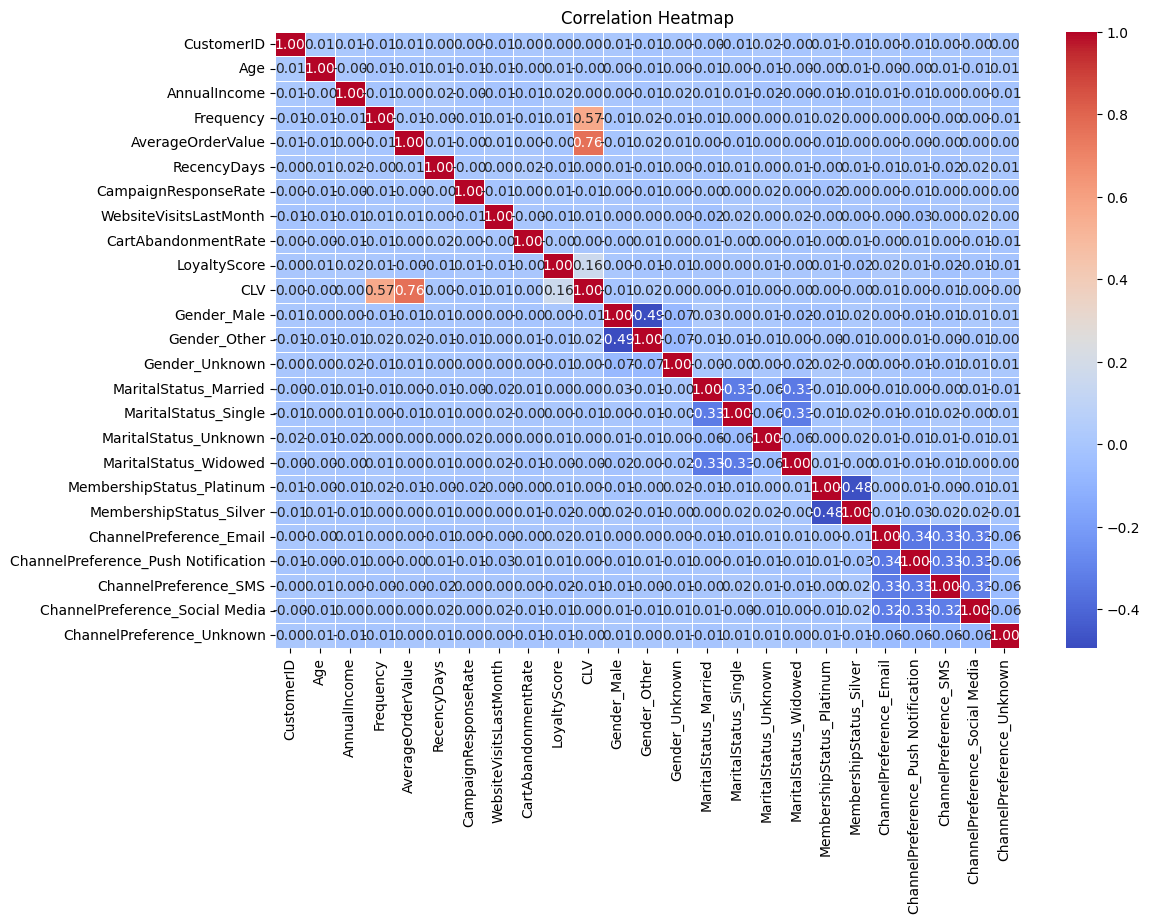

In [71]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Training the Model

Linear Regression and Comparing Random Forest

In [77]:
# Define features (X) and target (y)
X = df.drop(['CustomerID', 'LastPurchaseDate', 'CLV'], axis=1)
y = df['CLV']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 0.0012485159962682812
R2 Score: 0.9393607951032754


In [72]:
from sklearn.model_selection import train_test_split

# Define features (X) and target for regression
X = df.drop(['CustomerID', 'LastPurchaseDate', 'CLV'], axis=1)
y = df['CLV']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Create bins for classification
# This step creates 3 bins (Low, Medium, High) based on the values of the 'CLV' column using the qcut function.
# The 'q=3' means that the data will be divided into 3 equal-sized quantiles. The labels are assigned as 'Low', 'Medium', and 'High'.
df['CLV_Category'] = pd.qcut(df['CLV'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare features (X_cls) and target (y_cls)
# X_cls contains all the features except for 'CustomerID', 'LastPurchaseDate', 'CLV', and 'CLV_Category'.
# y_cls is the target variable, which is the 'CLV_Category' column (the classification labels: Low, Medium, High).
X_cls = df.drop(['CustomerID', 'LastPurchaseDate', 'CLV', 'CLV_Category'], axis=1)
y_cls = df['CLV_Category']

# Split data into training and testing sets
# This splits the data into training (80%) and testing (20%) sets, ensuring that the model will be evaluated on unseen data.
# 'random_state=42' ensures that the split is reproducible every time the code runs.
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

        High       0.92      0.94      0.93       623
         Low       0.94      0.92      0.93       600
      Medium       0.85      0.85      0.85       577

    accuracy                           0.91      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.91      0.91      0.91      1800



C:\Users\jaswa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


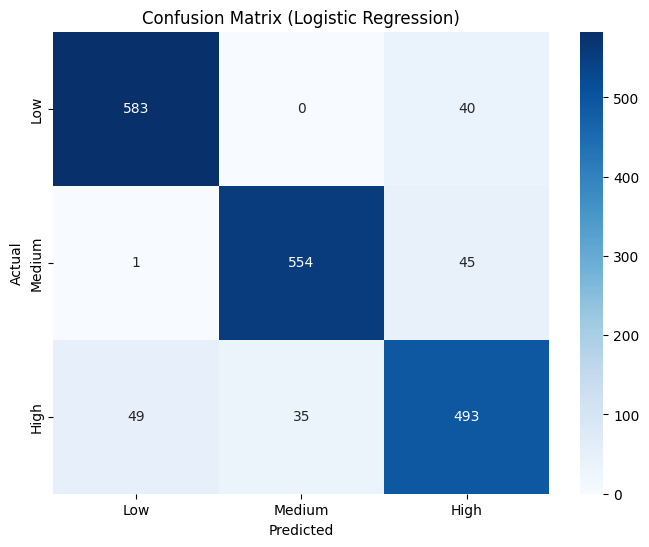

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_log = logreg.predict(X_test_cls)

# Print the classification report for performance evaluation
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_cls, y_pred_log))

# Create confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_log)

# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [82]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = clf.predict(X_test_cls)

print("Classification Report (Random Forest):")
print(classification_report(y_test_cls, y_pred_rf_cls))


Classification Report (Random Forest):
              precision    recall  f1-score   support

        High       0.96      0.94      0.95       623
         Low       0.97      0.96      0.96       600
      Medium       0.90      0.92      0.91       577

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



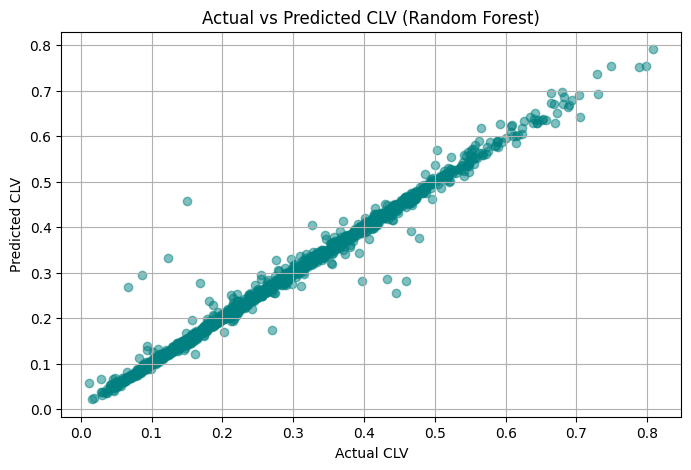

In [83]:
# Create a figure with a specific size for better visualization
plt.figure(figsize=(8, 5))

# Scatter plot of Actual vs Predicted CLV
# This plots the actual CLV values (`y_test`) on the x-axis and the predicted CLV values (`y_pred_rf`) on the y-axis.
# The alpha=0.5 makes the points semi-transparent, and the color is set to teal for better visual distinction.
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='teal')

# Label the x-axis as "Actual CLV"
plt.xlabel("Actual CLV")

# Label the y-axis as "Predicted CLV"
plt.ylabel("Predicted CLV")

# Set the title for the plot to describe what it represents
plt.title("Actual vs Predicted CLV (Random Forest)")

# Add grid lines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


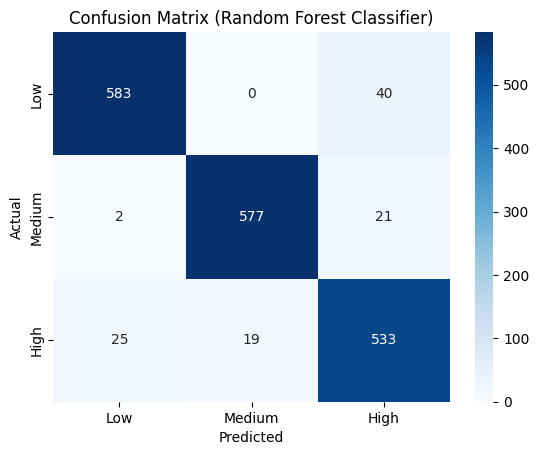

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for Random Forest classifier predictions
conf_matrix = confusion_matrix(y_test_cls, y_pred_rf_cls)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])

# Title for the heatmap
plt.title("Confusion Matrix (Random Forest Classifier)")

# X-axis label for predicted categories
plt.xlabel("Predicted")

# Y-axis label for actual categories
plt.ylabel("Actual")

# Display the plot
plt.show()


# The confusion matrix provides a visual representation of the performance of the Random Forest classifier in predicting CLV categories (Low, Medium, High). 
# It shows how many instances were correctly or incorrectly classified for each category. This helps to assess the model's accuracy, identify potential misclassifications, and guide improvements in future predictions.

### Conclusion

In this project, we successfully predicted Customer Lifetime Value (CLV) using various regression and
classification models, including Random Forest and Logistic Regression. After preprocessing the data and
handling missing values, we categorized CLV into Low, Medium, and High tiers for targeted marketing. 
The models were evaluated using performance metrics like R², accuracy, and confusion matrices, which helped assess prediction accuracy.
The insights gained allow for personalized marketing strategies, improving customer retention and resource allocation.
 Overall, the project demonstrates the potential of CLV prediction in enhancing business decision-making.